In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#Model Building
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
#Param=output_channel_no * (input_channel_no * kernel_height *kernel_width + 1)
32*(1*3*3+1)

320

In [ ]:
64*(32*3*3+1)

18496

In [ ]:
#Dense Layer
#Param=output_channel_no * (input_channel_no + 1)
64*(576+1)

36928

In [ ]:
#Train & Test Dataset
from keras.datasets import mnist
from keras.utils import to_categorical
#Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Normalise data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#Convert categories to binary representation
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Model Compilation
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

#Model Fit
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.1797 - accuracy: 0.9437
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0470 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 28s 29ms/step - loss: 0.0250 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0196 - accuracy: 0.9942


In [ ]:
#Model Validation
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 8ms/step - loss: 0.0398 - accuracy: 0.9859


0.9858999848365784

In [ ]:
#Model Prediction
# Predict labels on test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")

313/313 [==============================] - 2s 5ms/step
What Softmax predicted: [[1.05159099e-08 4.81564832e-08 8.61672831e-08 ... 9.94554281e-01
  2.99954081e-06 3.08261624e-05]
 [7.39003809e-08 2.51300690e-07 9.99999583e-01 ... 1.42741782e-11
  3.59958197e-09 8.68447295e-15]
 [5.16963077e-08 9.99841928e-01 2.01011346e-07 ... 7.96715904e-06
  4.65599487e-06 8.86049421e-08]
 ...
 [5.38424123e-13 6.82799151e-10 1.26142749e-12 ... 2.39532083e-09
  8.46118342e-10 1.12925145e-08]
 [1.48206809e-07 5.03891040e-10 2.39003428e-10 ... 1.52579682e-09
  1.17375661e-04 1.88999616e-09]
 [4.65333812e-07 9.05703013e-11 1.71178822e-08 ... 5.17310966e-13
  8.94589363e-08 2.61771133e-10]]
What Softmax actually means: [7 2 1 ... 4 5 6]


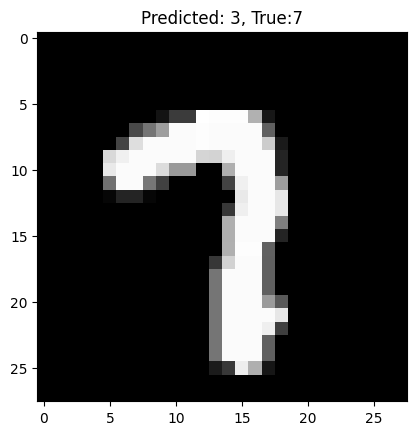

In [ ]:
# choose a random sample from all the test data
random_num = np.random.choice(len(test_images))
X_sample = test_images[random_num]

# save true label of this sample in a variable
y_true = np.argmax(test_labels, axis=1)
y_sample_true = y_true[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

# visualize
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");